# **Project Introduction:**

- This project focuses on predicting customer churn in the banking sector using demographic and financial data. 
- It aims to uncover key factors driving customer exits and identify high-risk segments. 
- The insights help design targeted strategies to improve customer retention and loyalty.

In [1]:
# import the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# load the datasets
df = pd.read_csv('Bank_Churn.csv')

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


## *The dataset is now ready for exploratory data visualization to extract meaningful insights.*

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

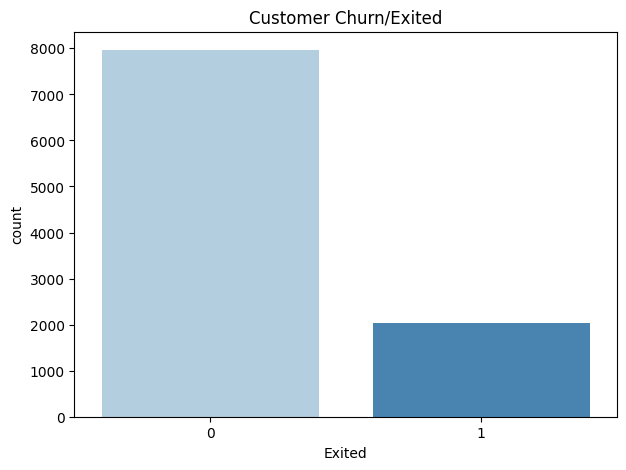

In [7]:
plt.figure(figsize=(7,5))
sns.countplot(x='Exited', data=df, palette='Blues')
plt.title('Customer Churn/Exited')
plt.show()

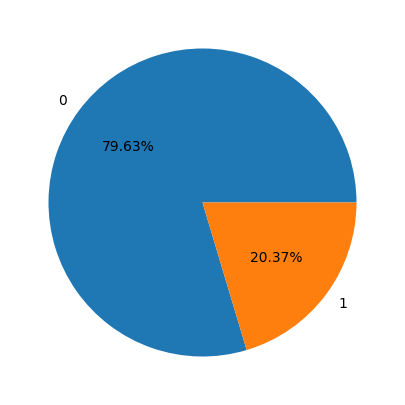

In [8]:
plt.figure(figsize=(7,5))
plt.pie(df.Exited.value_counts(), 
            labels=df.Exited.value_counts().index, 
            autopct='%1.2f%%')
plt.show()

## **Insight:** 
- The dataset indicates that 20.37% of customers have exited the bank

## *Framing the Demographic and Financial Patterns Behind Customer Churn*
- Male or female — who are leaving the bank more?
- Which age group is leaving the bank?
- What is the tenure of customers who are leaving the bank?
- What is the balance of customers who are leaving the bank?
- How many products do customers have who left and who didn’t?
- Which customers are leaving the bank more — those with or without a credit card?
- Are customers who left the bank active members or not?
- What is the estimated salary of customers who are leaving and not leaving the bank?)


## *Churn Analysis Based on Geography*

In [9]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

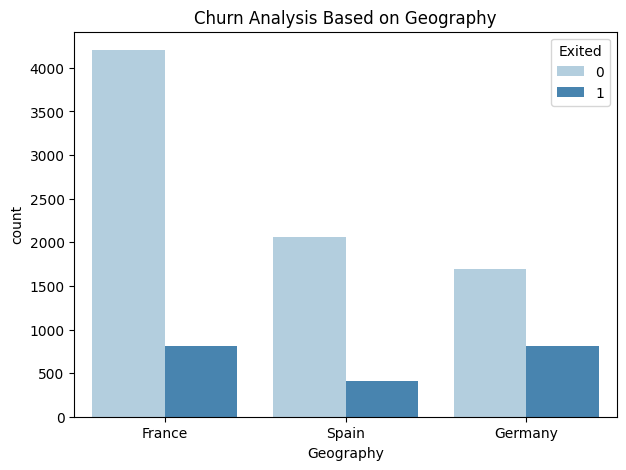

In [10]:
# customer churn analysis based on Geography
plt.figure(figsize=(7,5))
sns.countplot(x='Geography', data=df, hue='Exited', palette='Blues')
plt.title('Churn Analysis Based on Geography')
plt.show()

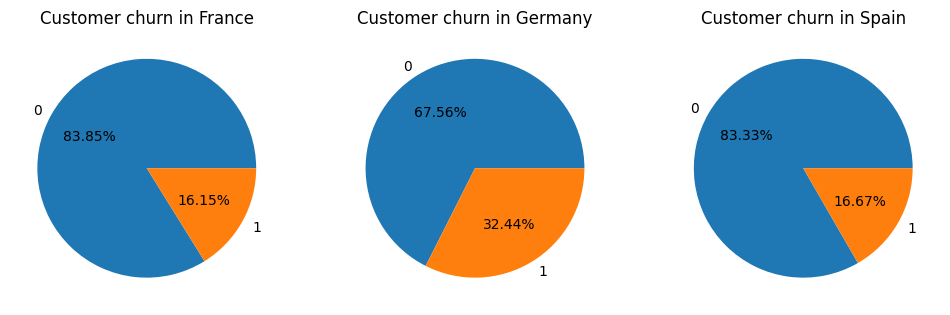

In [11]:
# customer churn analysis based on Geography
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.pie(df[df['Geography']=='France']['Exited'].value_counts(), 
        labels=df[df['Geography']=='France']['Exited'].value_counts().index,
       autopct='%1.2f%%')
plt.title('Customer churn in France',loc='center')

plt.subplot(1,3,2)
plt.pie(df[df['Geography']=='Germany']['Exited'].value_counts(), 
        labels=df[df['Geography']=='Germany']['Exited'].value_counts().index,
       autopct='%1.2f%%')
plt.title('Customer churn in Germany',loc='center')

plt.subplot(1,3,3)
plt.pie(df[df['Geography']=='Spain']['Exited'].value_counts(), 
        labels=df[df['Geography']=='Spain']['Exited'].value_counts().index,
       autopct='%1.2f%%')
plt.title('Customer churn in Spain',loc='center')

plt.savefig("Geography_churn.png", dpi=300, bbox_inches='tight')
plt.show()

## **Insight**
- Customer churn in Germany are significant higher then other countries.

## *Churn Analysis Based on Gender*

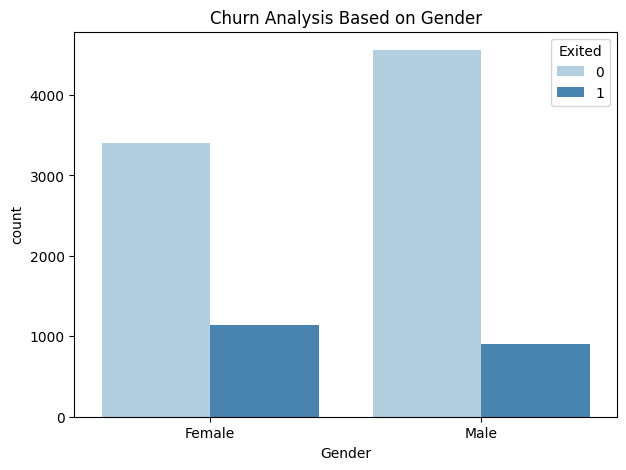

In [12]:
# customer churn analysis based on gender
plt.figure(figsize=(7,5))
sns.countplot(x='Gender', data=df, hue='Exited', palette='Blues')
plt.title('Churn Analysis Based on Gender')
plt.show()

In [13]:
df[df['Gender']=='Male']['Exited'].value_counts()

Exited
0    4559
1     898
Name: count, dtype: int64

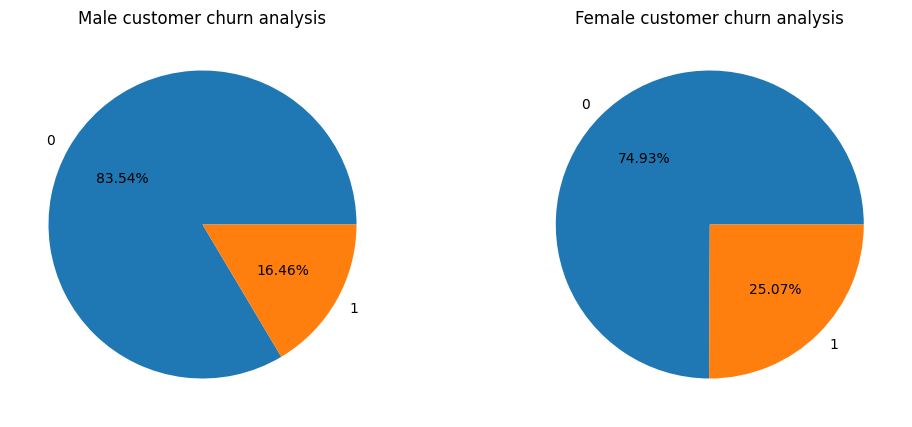

In [14]:
# customer churn analysis based on gender
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.pie(df[df['Gender']=='Male']['Exited'].value_counts(), 
        labels=df[df['Gender']=='Male']['Exited'].value_counts().index,
       autopct='%1.2f%%')
plt.title('Male customer churn analysis',loc='center')

plt.subplot(1,2,2)
plt.pie(df[df['Gender']=='Female']['Exited'].value_counts(), 
        labels=df[df['Gender']=='Male']['Exited'].value_counts().index,
       autopct='%1.2f%%')
plt.title('Female customer churn analysis',loc='center')

plt.savefig("Gender_churn.png", dpi=300, bbox_inches='tight')
plt.show()

## **Insight:** 
- Female customers exhibit a higher churn rate compared to male customers.

## *Customer Exit Trends by Age Group*

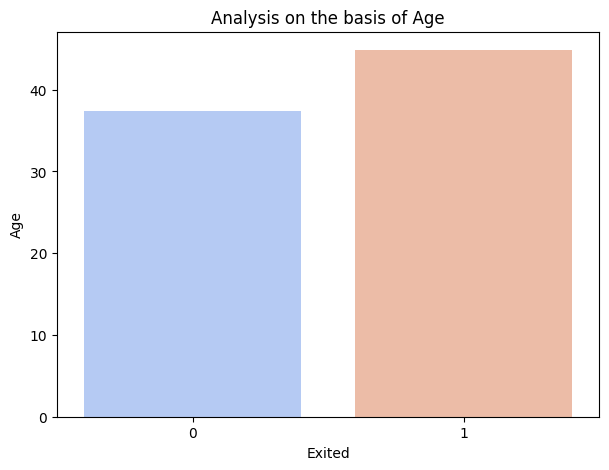

In [15]:
plt.figure(figsize=(7,5))
sns.barplot(x='Exited', y='Age', ci=None, data=df, palette='coolwarm')
plt.title('Analysis on the basis of Age')
plt.show()

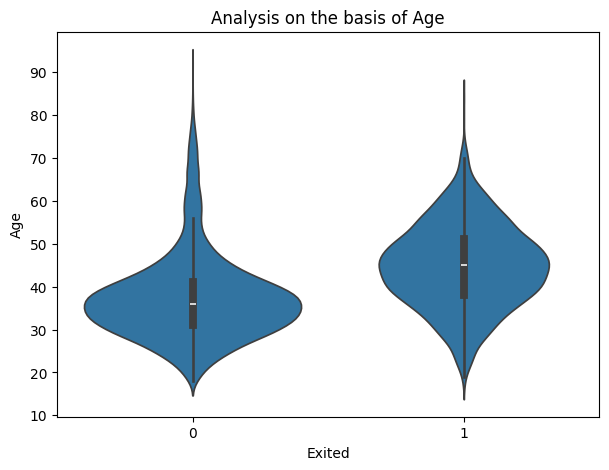

In [16]:
plt.figure(figsize=(7,5))
sns.violinplot(x='Exited', y='Age', data=df)
plt.title('Analysis on the basis of Age')
plt.savefig("Age_churn.png", dpi=300, bbox_inches='tight')
plt.show()

## **Insight**
- The age group of 40 to 50 years shows the highest likelihood of customer churn.

## *Impact of Tenure on Customer Churn*

In [17]:
len(df['Tenure'].value_counts())

11

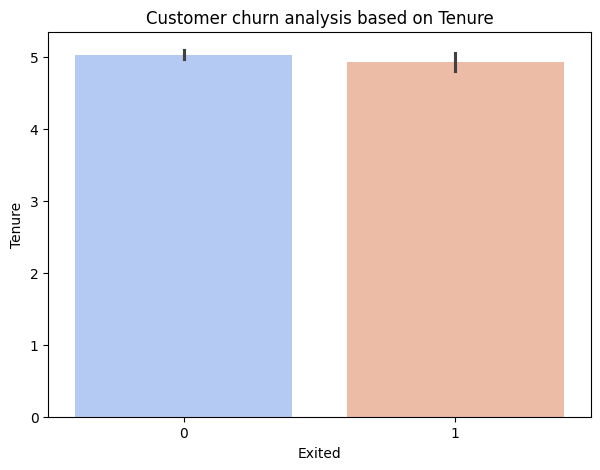

In [18]:
plt.figure(figsize=(7,5))
sns.barplot(x='Exited', y='Tenure', data=df, palette='coolwarm')
plt.title('Customer churn analysis based on Tenure')
plt.show()

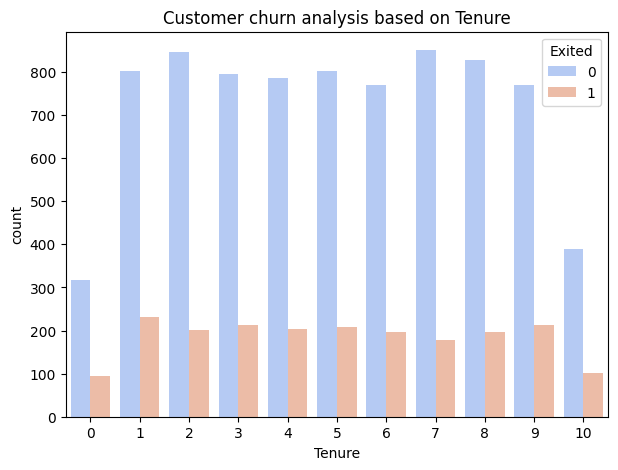

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(x='Tenure', data=df, hue='Exited',palette='coolwarm')
plt.title('Customer churn analysis based on Tenure')
plt.show()

#### *Customer exits are uniformly distributed across different tenure periods, indicating no strong correlation between tenure and churn*

## *Churn Behavior in Relation to Account Balance*

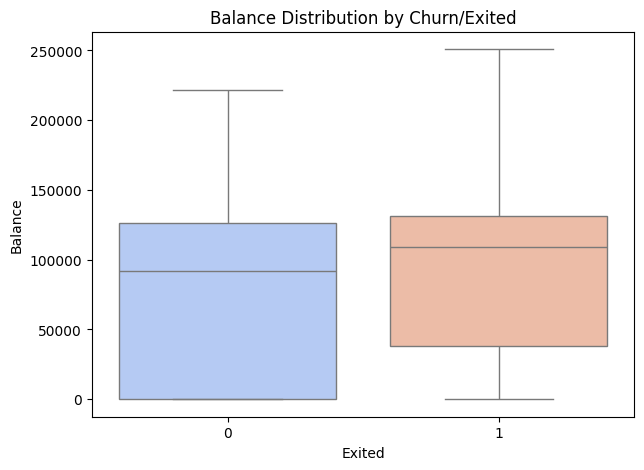

In [20]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Exited', y='Balance', data=df, palette='coolwarm')
plt.title('Balance Distribution by Churn/Exited')
plt.show()

In [21]:
df[df['Exited']==1]['Balance'].mean()

91108.53933726068

In [22]:
df[df['Exited']==0]['Balance'].mean()

72745.2967788522

## Alarming: 
- Customer having more account balance are more likely exit the bank, may be due to not satishfied with services.

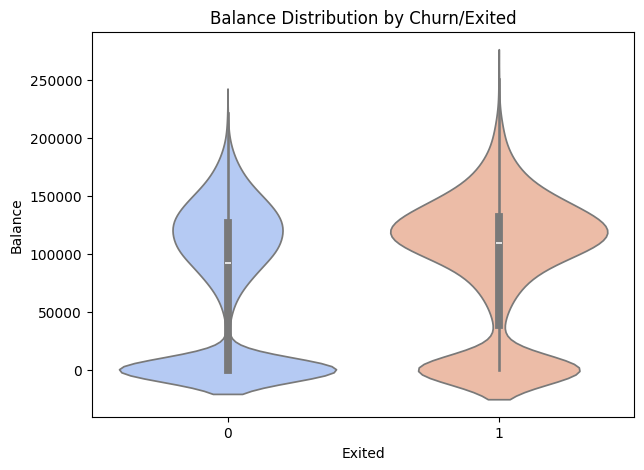

In [23]:
plt.figure(figsize=(7,5))
sns.violinplot(x='Exited', y='Balance', data=df, palette='coolwarm')
plt.title('Balance Distribution by Churn/Exited')
plt.ylabel('Balance')
plt.savefig("Balance_churn.png", dpi=300, bbox_inches='tight')
plt.show()

## **Insight** 
- Customers with a balance ranging between 100,000 and 150,000 demonstrate a notably higher exit rate.

## *Product Holding Patterns and Their Influence on Churn*

In [24]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

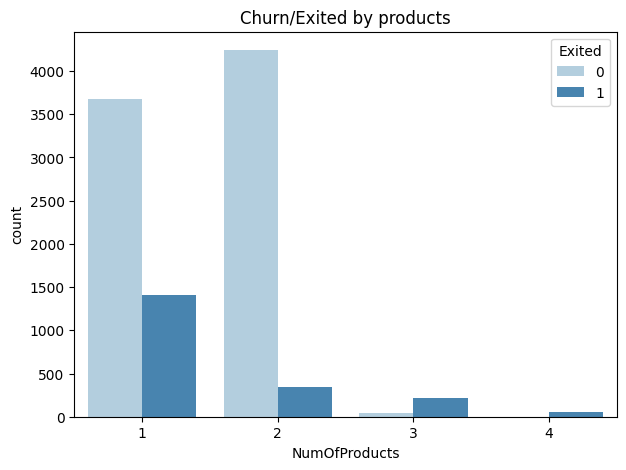

In [25]:
plt.figure(figsize=(7,5))
sns.countplot(x='NumOfProducts', data=df, hue='Exited', palette='Blues')
plt.title('Churn/Exited by products')
plt.show()

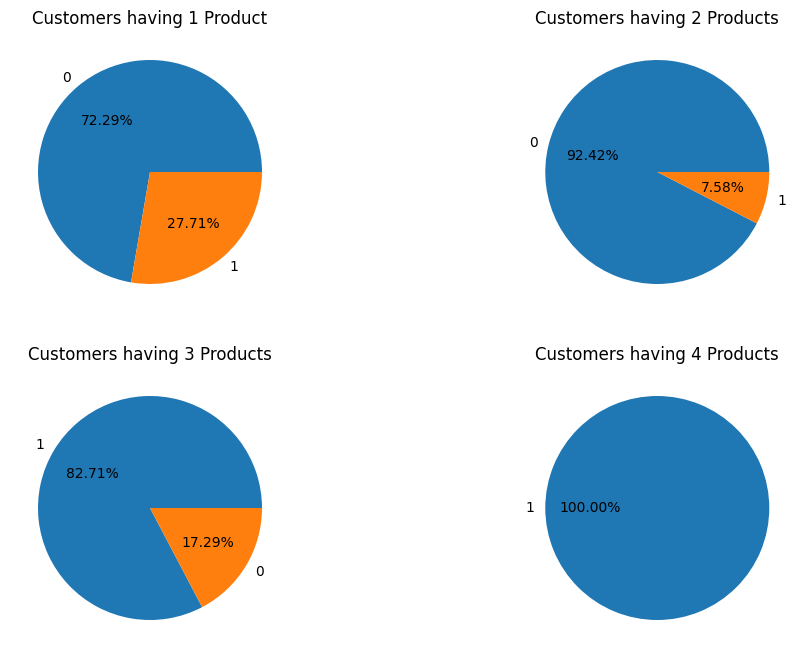

In [26]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.pie(df[df['NumOfProducts']==1]['Exited'].value_counts(), 
        labels=df[df['NumOfProducts']==1]['Exited'].value_counts().index,
       autopct='%1.2f%%')
plt.title('Customers having 1 Product')

plt.subplot(2,2,2)
plt.pie(df[df['NumOfProducts']==2]['Exited'].value_counts(), 
        labels=df[df['NumOfProducts']==2]['Exited'].value_counts().index,
       autopct='%1.2f%%')
plt.title('Customers having 2 Products')

plt.subplot(2,2,3)
plt.pie(df[df['NumOfProducts']==3]['Exited'].value_counts(), 
        labels=df[df['NumOfProducts']==3]['Exited'].value_counts().index,
       autopct='%1.2f%%')
plt.title('Customers having 3 Products')

plt.subplot(2,2,4)
plt.pie(df[df['NumOfProducts']==4]['Exited'].value_counts(), 
        labels=df[df['NumOfProducts']==4]['Exited'].value_counts().index,
       autopct='%1.2f%%')

plt.title('Customers having 4 Products')
plt.savefig("Product_churn.png", dpi=300, bbox_inches='tight')
plt.show()

## **Insight:**
- Those holding only one product are more likely to leave the bank than multi-product holders.

### *Effect of Credit Card Ownership on Customer Retention*

In [27]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

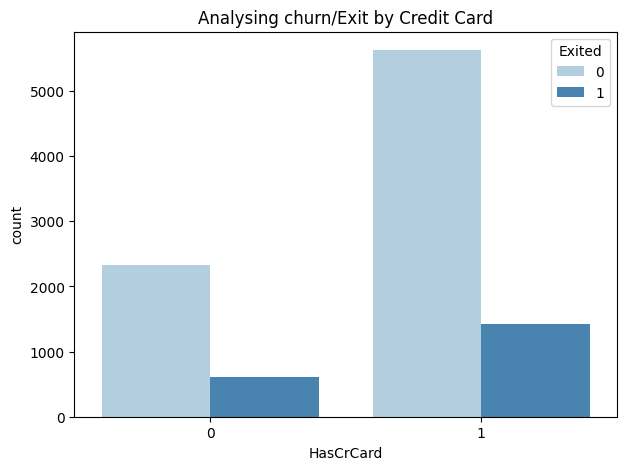

In [28]:
plt.figure(figsize=(7,5))
sns.countplot(x='HasCrCard', data=df, palette='Blues', hue='Exited')
plt.title('Analysing churn/Exit by Credit Card')
plt.show()

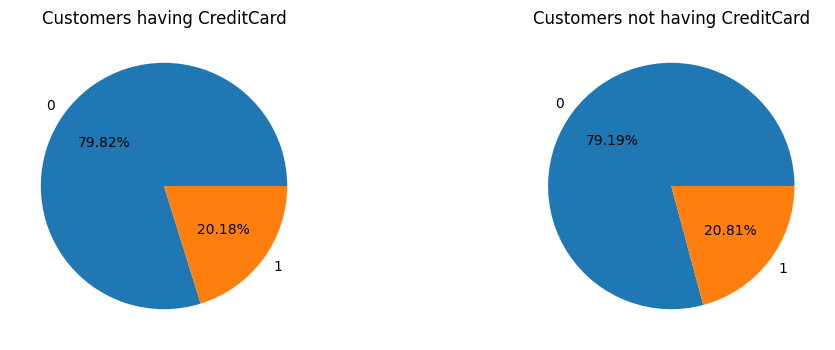

In [29]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

plt.pie(df[df['HasCrCard']==1]['Exited'].value_counts(), 
        labels=df[df['HasCrCard']==1]['Exited'].value_counts().index,
       autopct='%1.2f%%')
plt.title('Customers having CreditCard',loc='center')

plt.subplot(1,2,2)
plt.pie(df[df['HasCrCard']==0]['Exited'].value_counts(), 
        labels=df[df['HasCrCard']==0]['Exited'].value_counts().index,
       autopct='%1.2f%%')

plt.title('Customers not having CreditCard',loc='center')
plt.savefig("CreditCard_churn.png", dpi=300, bbox_inches='tight')
plt.show()

#### *Churn rates are nearly identical between customers who hold a credit card and those who do not*

## *Churn Comparison Between Active and Inactive Members*

In [30]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

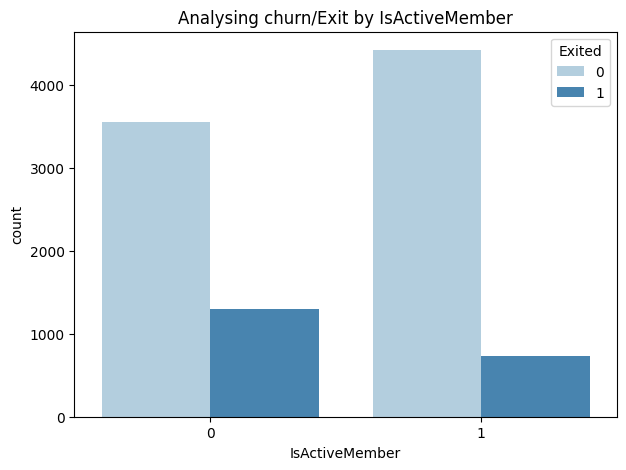

In [31]:
plt.figure(figsize=(7,5))
sns.countplot(x='IsActiveMember', data=df, palette='Blues', hue='Exited')
plt.title('Analysing churn/Exit by IsActiveMember')
plt.show()

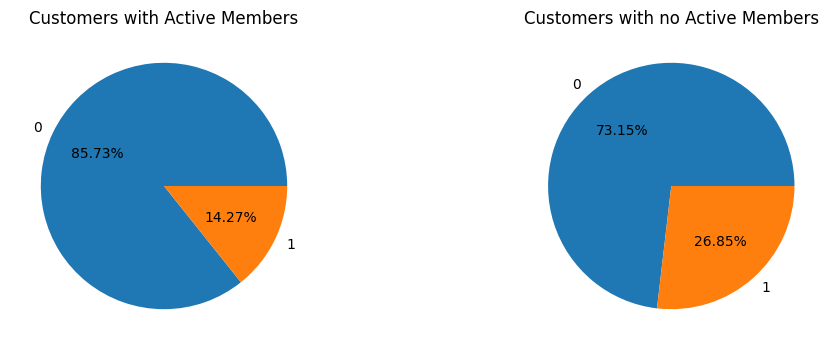

In [32]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

plt.pie(df[df['IsActiveMember']==1]['Exited'].value_counts(), 
        labels=df[df['IsActiveMember']==1]['Exited'].value_counts().index,
       autopct='%1.2f%%')
plt.title('Customers with Active Members',loc='center')

plt.subplot(1,2,2)
plt.pie(df[df['IsActiveMember']==0]['Exited'].value_counts(), 
        labels=df[df['IsActiveMember']==0]['Exited'].value_counts().index,
       autopct='%1.2f%%')

plt.title('Customers with no Active Members',loc='center')
plt.savefig("ActiveMember_churn.png", dpi=300, bbox_inches='tight')
plt.show()

## **Insights:** 
- A significant churn rate of approximately 25% is observed among customers who are not active members.

## *Estimated Salary Distribution Among Churned and Retained Customers*

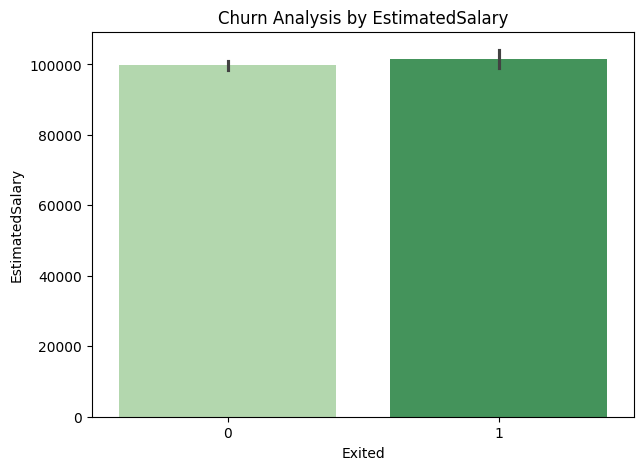

In [33]:
plt.figure(figsize=(7,5))
sns.barplot(x='Exited', y='EstimatedSalary', data=df, palette='Greens')
plt.title('Churn Analysis by EstimatedSalary')
plt.show()

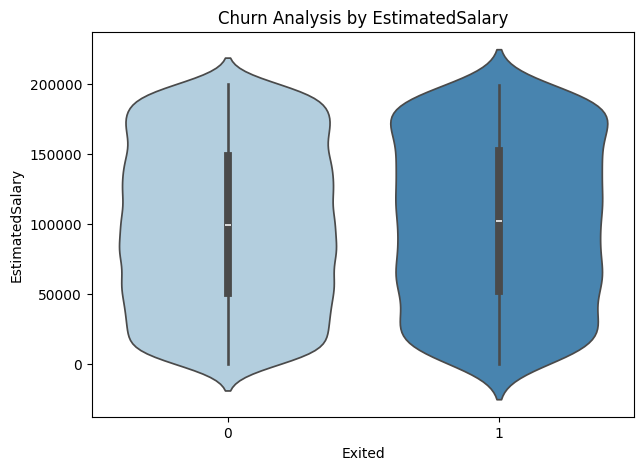

In [34]:
plt.figure(figsize=(7,5))
sns.violinplot(x='Exited', y='EstimatedSalary', data=df, palette='Blues')
plt.title('Churn Analysis by EstimatedSalary')
plt.ylabel('EstimatedSalary')
plt.show()

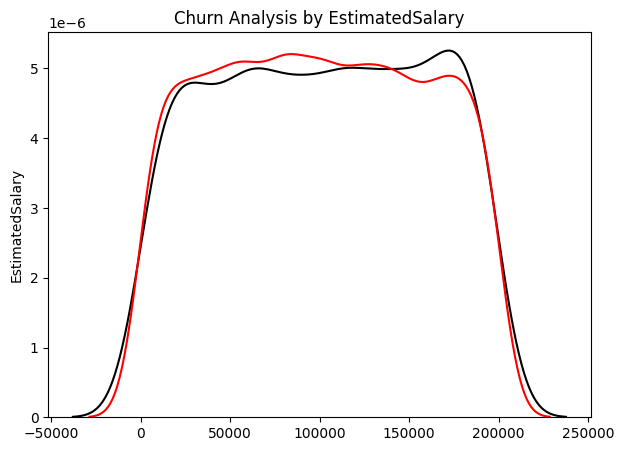

In [35]:
plt.figure(figsize=(7,5))
sns.distplot(x=df[df['Exited']==1]['EstimatedSalary'], hist=False, label='No', color='black')
sns.distplot(x=df[df['Exited']==0]['EstimatedSalary'], hist=False, label='Yes', color='red')
plt.title('Churn Analysis by EstimatedSalary')
plt.ylabel('EstimatedSalary')
plt.show()

### *Estimated salary does not show a significant impact on customer churn.*

## **Conclusion**

- The dataset indicates that **20.37% of customers have exited the bank**.
- Customer churn in **Germany are significant higher then other countries**.
- **Female customers exhibit a higher churn rate** compared to male customers.  
- The **age group of 40 to 50 years** shows the **highest likelihood of customer churn**.  
- Customers with a **balance ranging between 100,000 and 150,000** demonstrate a **notably higher exit rate**.  
- Those holding **only one product** are **more likely to leave the bank** than multi-product holders.  
- A **significant churn rate of approximately 25%** is observed among customers who are **not active members**.


### **Recommendations**

1. **Develop Targeted Retention Strategies for Female Customers**  
   Since female customers show a higher churn rate, consider launching personalized engagement campaigns, loyalty programs, or feedback initiatives specifically tailored to their preferences and concerns.

2. **Implement Proactive Outreach for Customers Aged 40–50**  
   Customers in this age group are more likely to leave. Providing financial planning support, customized product bundles, or exclusive offers may improve retention within this segment.

3. **Monitor and Support Customers with Mid-Range Balances (₹100,000–₹150,000)**  
   This group demonstrates a higher exit rate. Introduce incentives such as higher interest rates on savings, free advisory services, or tiered benefits to increase their satisfaction and loyalty.

4. **Encourage Product Adoption Through Cross-Selling**  
   As single-product customers are more likely to churn, promote additional products (e.g., insurance, investment services, credit cards) through cross-selling campaigns and bundled offerings to increase stickiness.

5. **Enhance Engagement with Inactive Members**  
   With a churn rate of ~25% among inactive members, prioritize re-engagement strategies such as personalized communication, app usage nudges, or rewards for activity to reactivate their relationship with the bank.


# *Model Building:*

In [36]:
# import the scikit-learn library for model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV


In [37]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
df1 = df.sample(n=9000)

In [39]:
df1['Exited'].value_counts()

Exited
0    7174
1    1826
Name: count, dtype: int64

# *Data Visualisation*

In [40]:
df1.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [41]:
df1 = df.drop(['CustomerId', 'Surname'], axis=1)

In [42]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **Univariate Analysis**

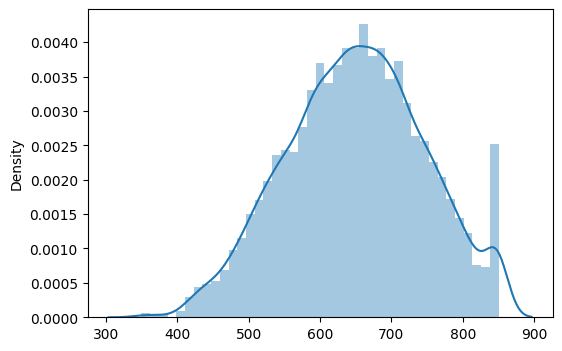

In [43]:
# Univariate Analysis
plt.figure(figsize=(6,4))
sns.distplot(x=df1['CreditScore'])
plt.savefig("CreditScore.png", dpi=300)
plt.show()

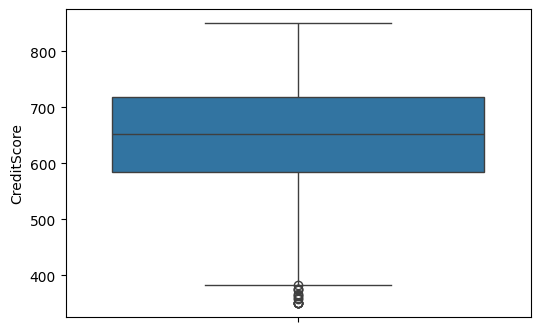

In [44]:
plt.figure(figsize=(6,4))
sns.boxplot(df1['CreditScore'])
plt.savefig("CreditScore.png", dpi=300)
plt.show()

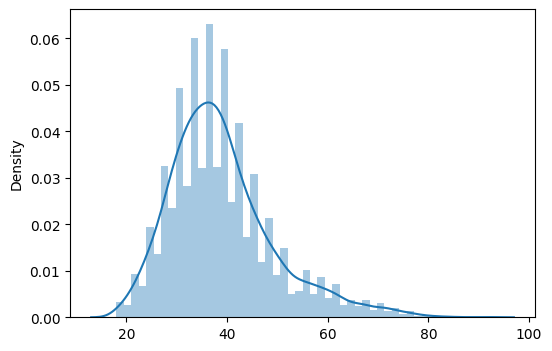

In [45]:
plt.figure(figsize=(6,4))
sns.distplot(x=df1['Age'])
plt.savefig("Age-Dist.png", dpi=300)
plt.show()

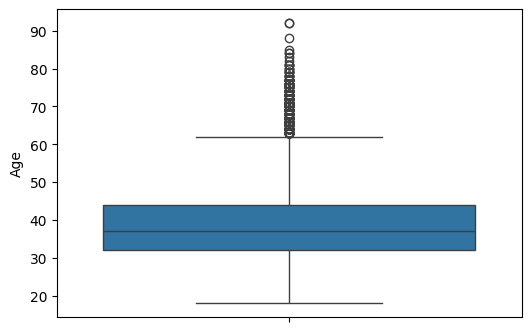

In [46]:
plt.figure(figsize=(6,4))
sns.boxplot(df1['Age'])
plt.savefig("AgeDist.png", dpi=300)
plt.show()

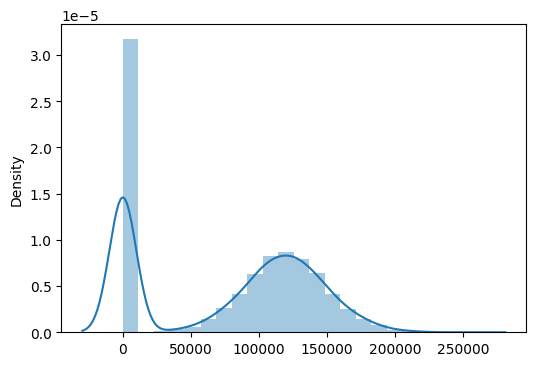

In [47]:
plt.figure(figsize=(6,4))
sns.distplot(x=df1['Balance'])
plt.savefig("Balancd.png", dpi=300)
plt.show()

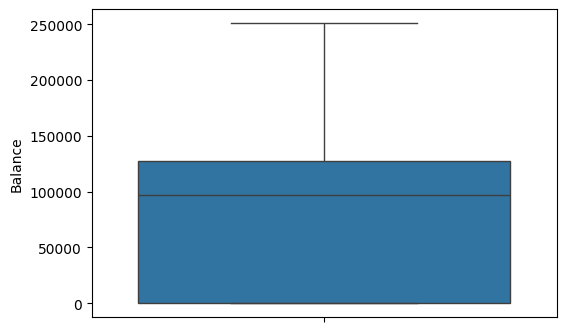

In [48]:
plt.figure(figsize=(6,4))
sns.boxplot(df1['Balance'])
plt.savefig("Balance.png", dpi=300)
plt.show()

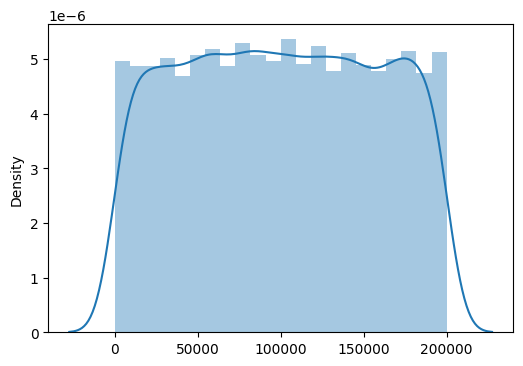

In [49]:
plt.figure(figsize=(6,4))
sns.distplot(x=df1['EstimatedSalary'])
plt.savefig("ExtimatedSalary.png", dpi=300)
plt.show()

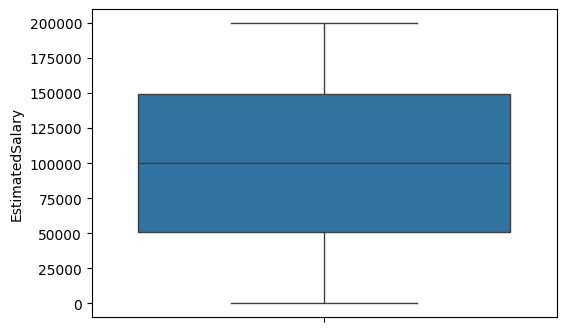

In [50]:
plt.figure(figsize=(6,4))
sns.boxplot(df1['EstimatedSalary'])
plt.savefig("Estimated.png", dpi=300)
plt.show()

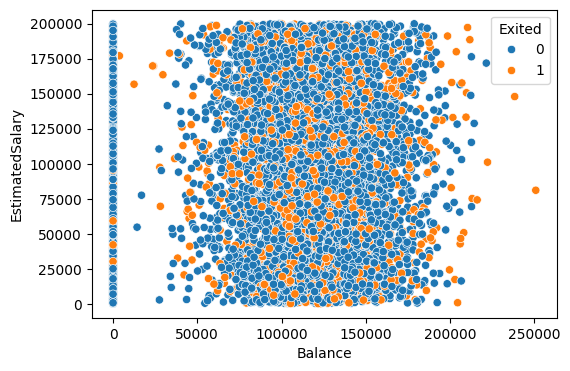

In [51]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Balance', y='EstimatedSalary', data=df1, hue='Exited')
plt.show()

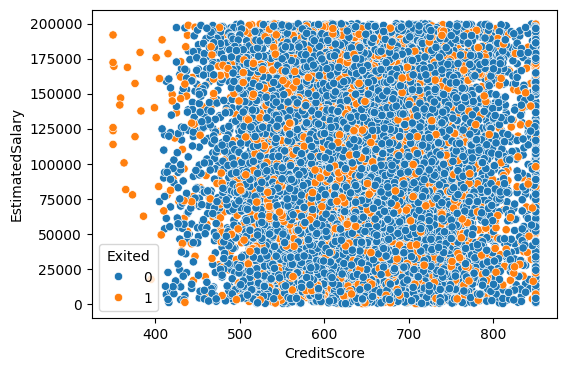

In [52]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='CreditScore', y='EstimatedSalary', data=df1, hue='Exited')
plt.show()

In [53]:
df1.corr(numeric_only=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


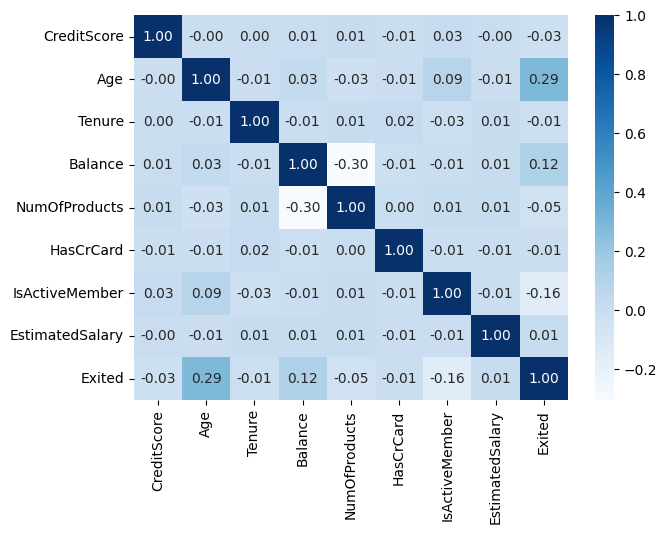

In [54]:
plt.figure(figsize=(7,5))
sns.heatmap(df1.corr(numeric_only=True), annot=True, fmt=".2f", cmap='Blues')
plt.savefig("Correlation.png", dpi=300, bbox_inches='tight')
plt.show()

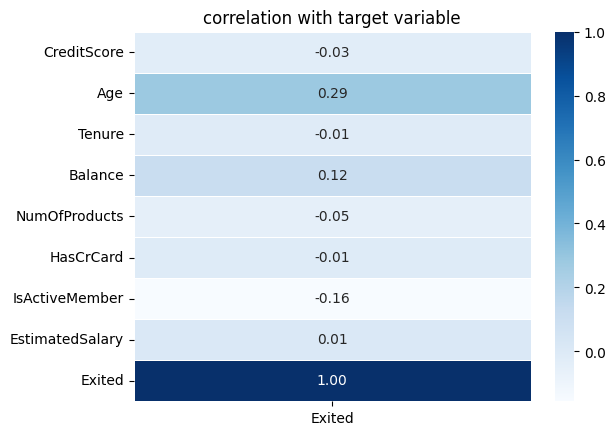

In [55]:
# Extract correlation with target variable
corr = df1.corr(numeric_only=True)
target_corr = corr[['Exited']]
sns.heatmap(target_corr, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('correlation with target variable')
plt.savefig("Corr_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

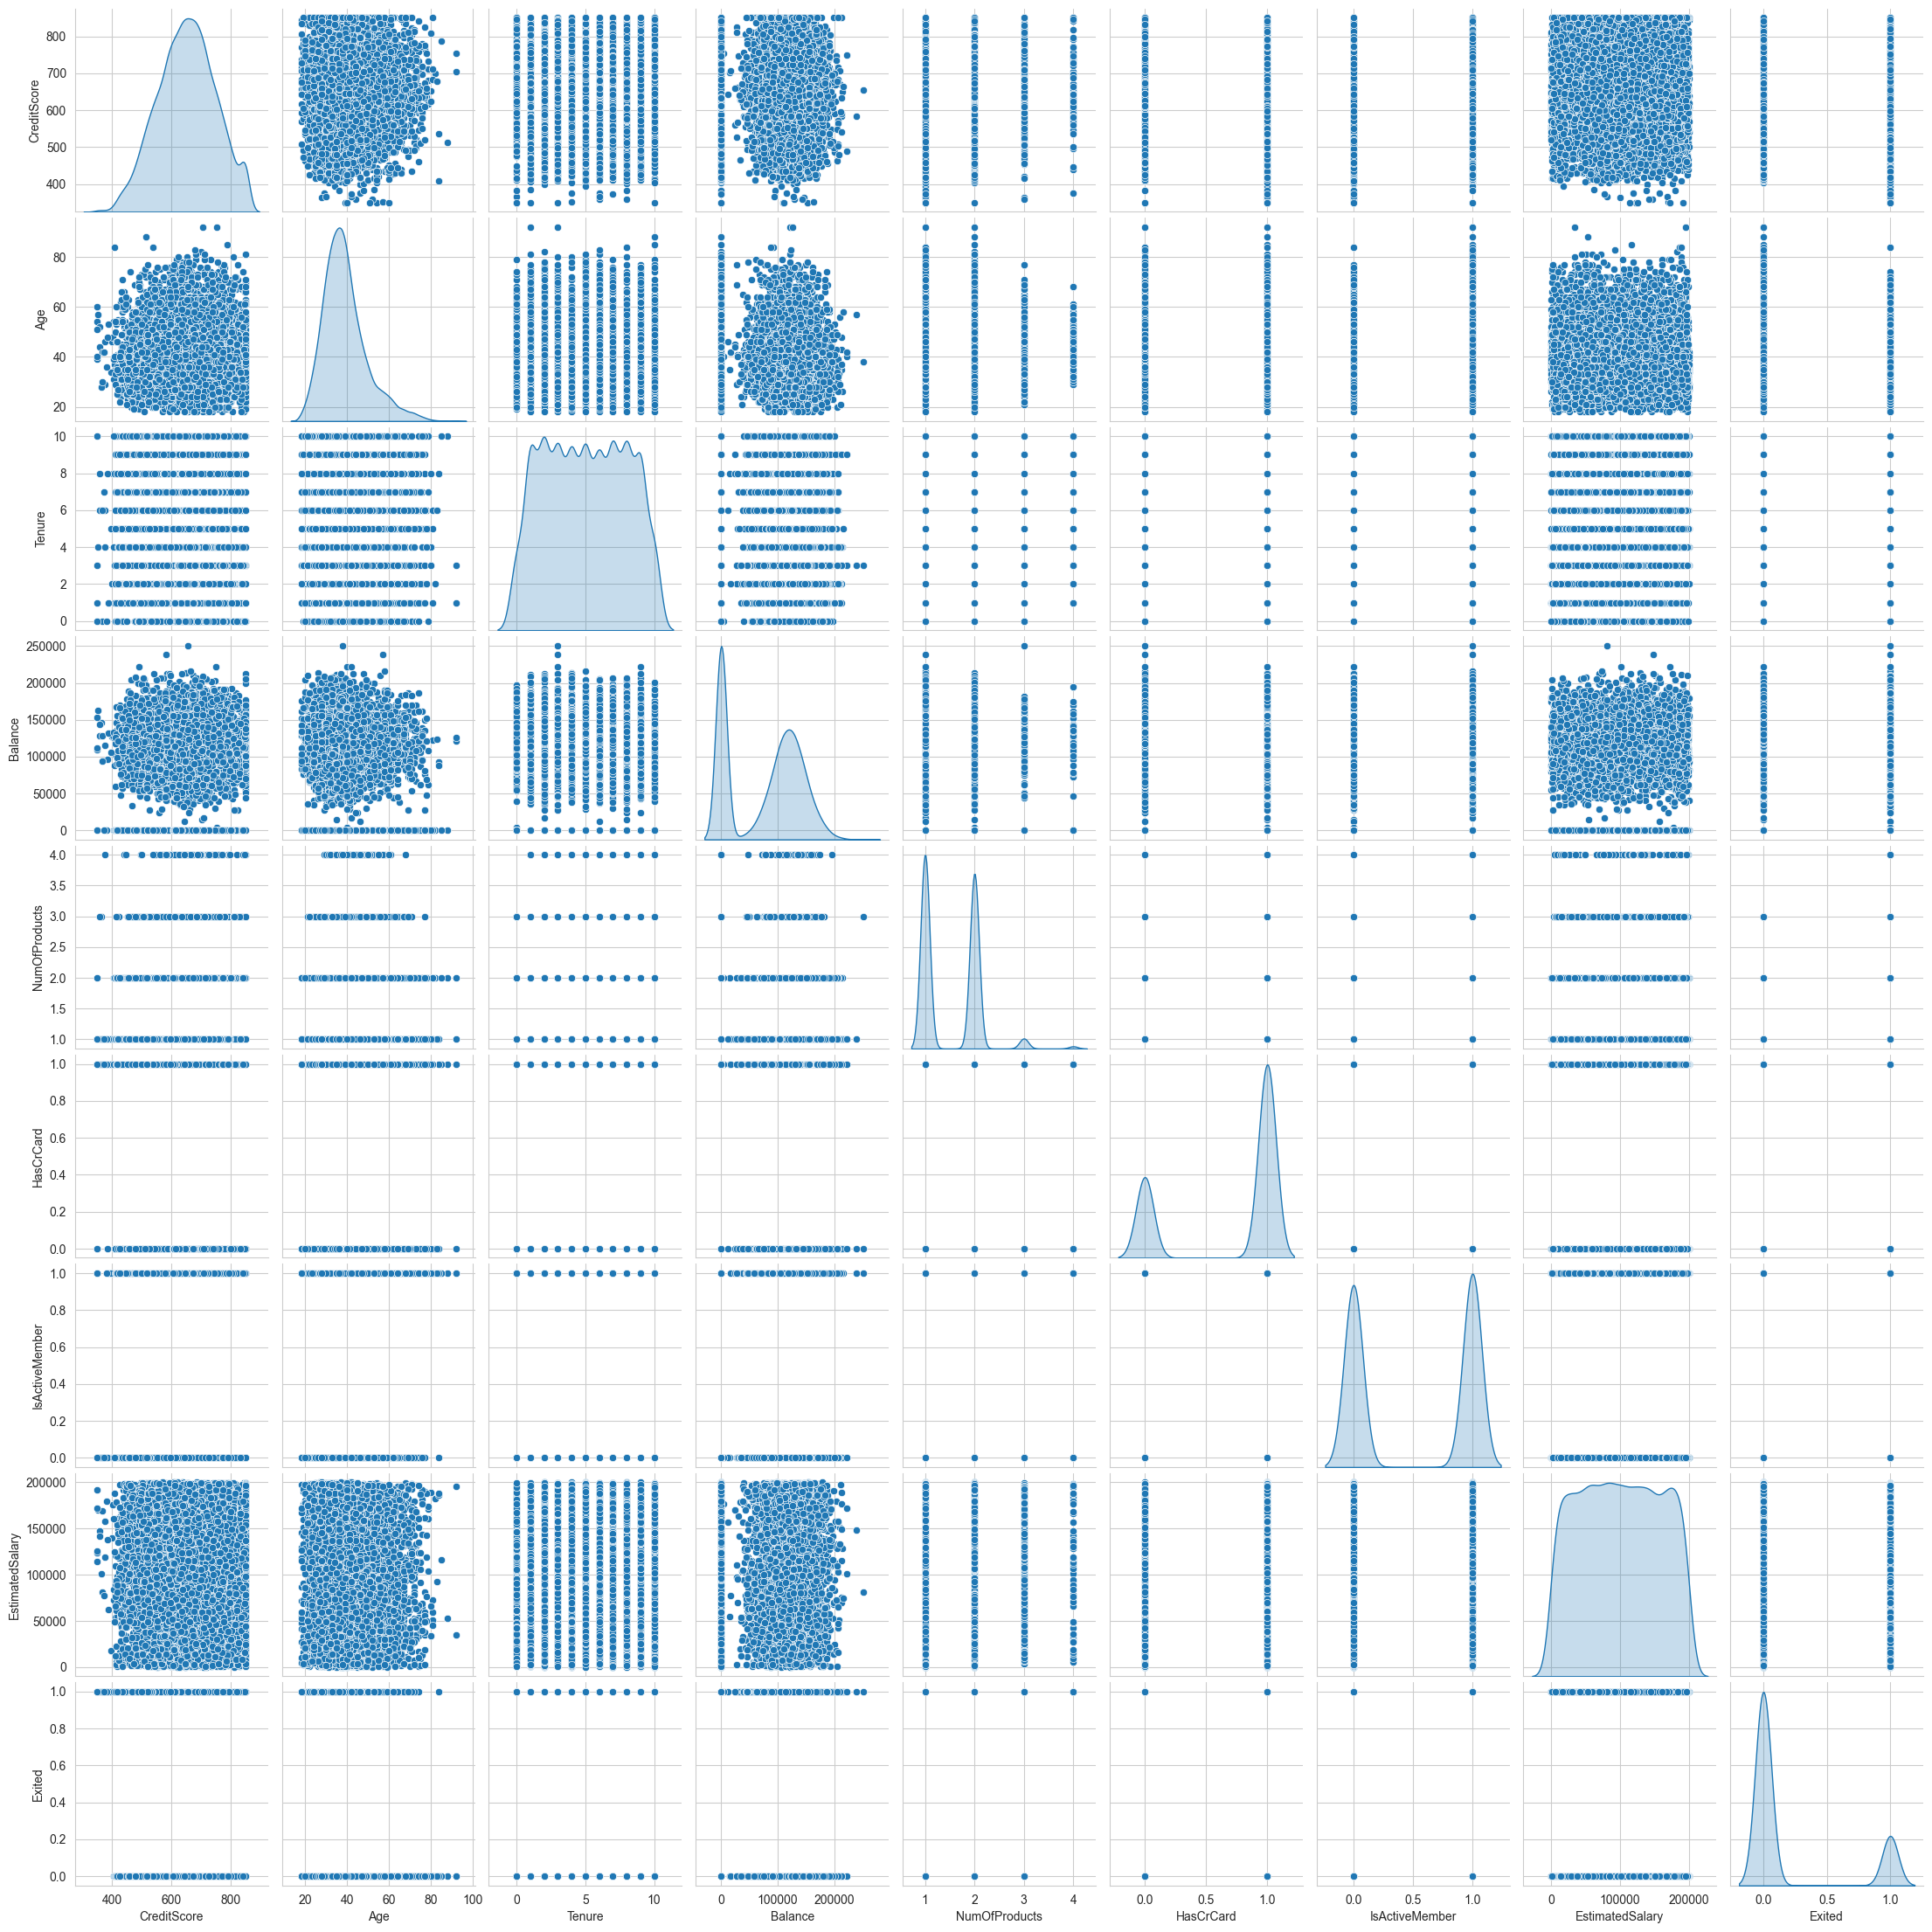

In [56]:
sns.set_style('whitegrid')
sns.pairplot(data=df1, diag_kind='kde')
plt.savefig("pairplot.png", dpi=300, bbox_inches='tight')
plt.show()

In [57]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [58]:
le = LabelEncoder()
df1['Geography'] = le.fit_transform(df['Geography'])
df1['Gender'] = le.fit_transform(df['Gender'])

In [59]:
df1 = pd.get_dummies(df1, columns=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'], 
                     drop_first=True, dtype=int)

In [60]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_1,Geography_2,Gender_1,HasCrCard_1,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,0,0,0,1,1
1,608,41,1,83807.86,1,112542.58,0,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,0,0,0,1,0
3,699,39,1,0.00,2,93826.63,0,0,0,0,0,0
4,850,43,2,125510.82,1,79084.10,0,0,1,0,1,1


In [61]:
X = df1.drop(columns='Exited', axis=1)
y = df1['Exited']

In [62]:
# **Preprocessing:**

# 1. Split data into train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Scaling the data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Apply PCA
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 4. Applying resampling to balance X_train_pca, y_train
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_pca, y_train)
print(X_train_res.shape, y_train_res.shape)


(12712, 10) (12712,)


In [63]:
print(y_train.value_counts(normalize=True))
print('------------'*5)
print(y_train_res.value_counts(normalize=True))

Exited
0    0.7945
1    0.2055
Name: proportion, dtype: float64
------------------------------------------------------------
Exited
0    0.5
1    0.5
Name: proportion, dtype: float64


In [64]:
# Define models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('XGBClassifier', XGBClassifier()))

scoring = 'accuracy'  
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_res, y_train_res, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f'{name}: Mean Accuracy = {cv_results.mean():.4f}, Std = {cv_results.std():.4f}')

LogisticRegression: Mean Accuracy = 0.6997, Std = 0.0141
DecisionTreeClassifier: Mean Accuracy = 0.8261, Std = 0.0149
RandomForestClassifier: Mean Accuracy = 0.8918, Std = 0.0093
KNeighborsClassifier: Mean Accuracy = 0.8611, Std = 0.0082
XGBClassifier: Mean Accuracy = 0.8738, Std = 0.0097


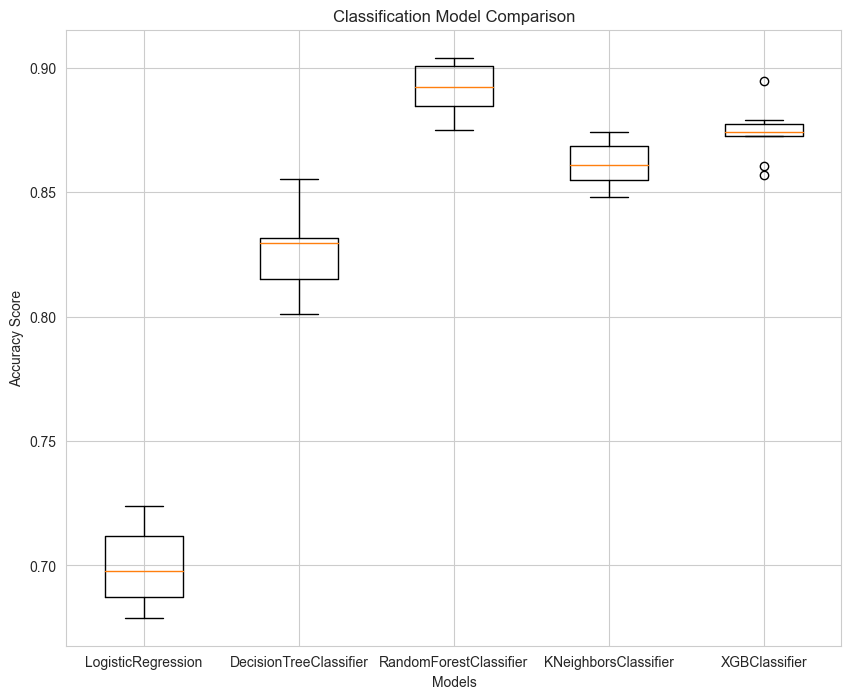

In [65]:
# Compare Classification Models
plt.figure(figsize=(10, 8))
plt.boxplot(results, labels=names)
plt.title('Classification Model Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.show()


In [66]:
# Hyperparameter search
param_grid = {
    "LogisticRegression": {
        "C": [0.01, 0.1, 1, 10],
        "solver": ["liblinear", "lbfgs"],
        "penalty": ["l1", "l2"],
        "max_iter": [100, 200]
    },
    "DecisionTreeClassifier": {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["gini", "entropy"]
    },
    "RandomForestClassifier": {
        "n_estimators": [100, 200, 500],
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["gini", "entropy"]
    },
    "KNeighborsClassifier": {
        "n_neighbors": [3, 5, 7, 10],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    },
    "XGBClassifier": {
        "n_estimators": [100, 200, 500],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.8, 1.0],
        "use_label_encoder": [False],
        "eval_metric": ["logloss"]
    }
}


In [67]:
# Best Hyperparameters for Each Classification Model
best_params = {}

for name, model in [
    ("LogisticRegression", LogisticRegression()),
    ("DecisionTreeClassifier", DecisionTreeClassifier()),
    ("RandomForestClassifier", RandomForestClassifier()),
    ("KNeighborsClassifier", KNeighborsClassifier()),
    ("XGBClassifier", XGBClassifier(use_label_encoder=False, eval_metric="logloss"))
]:
    search = RandomizedSearchCV(
        model, 
        param_distributions=param_grid[name], 
        n_iter=10,
        cv=5,
        scoring="accuracy",  # Classification metric
        n_jobs=-1,
        random_state=42
    )
    search.fit(X_train_res, y_train_res)
    best_params[name] = search.best_params_

# Print Best Hyperparameters
print("Best Hyperparameters for Each Classification Model:")
for model, params in best_params.items():
    print(f"{model}: {params}")


Best Hyperparameters for Each Classification Model:
LogisticRegression: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'C': 0.01}
DecisionTreeClassifier: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}
RandomForestClassifier: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy'}
KNeighborsClassifier: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan'}
XGBClassifier: {'use_label_encoder': False, 'subsample': 0.8, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.2, 'eval_metric': 'logloss'}


In [68]:
best_params = {
"LogisticRegression": {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'C': 0.01},
"DecisionTreeClassifier": {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'},
"RandomForestClassifier": {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy'},
"KNeighborsClassifier": {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan'},
"XGBClassifier": {'use_label_encoder': False, 'subsample': 0.8, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.2, 'eval_metric': 'logloss'}
}

# Initialize models with best hyperparameters
models = [
    ("LogisticRegression", LogisticRegression(**best_params["LogisticRegression"])),
    ("DecisionTreeClassifier", DecisionTreeClassifier(**best_params["DecisionTreeClassifier"])),
    ("RandomForestClassifier", RandomForestClassifier(**best_params["RandomForestClassifier"])),
    ("KNeighborsClassifier", KNeighborsClassifier(**best_params["KNeighborsClassifier"])),
    ("XGBClassifier", XGBClassifier(**best_params["XGBClassifier"]))
]

# Cross-validation setup
results = []
names = []
scoring = 'accuracy'  # Classification metric

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_res, y_train_res, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f'{name}: Mean Accuracy = {cv_results.mean():.4f}, Std = {cv_results.std():.4f}')


LogisticRegression: Mean Accuracy = 0.7068, Std = 0.0149
DecisionTreeClassifier: Mean Accuracy = 0.8237, Std = 0.0148
RandomForestClassifier: Mean Accuracy = 0.8836, Std = 0.0105
KNeighborsClassifier: Mean Accuracy = 0.8861, Std = 0.0067
XGBClassifier: Mean Accuracy = 0.8999, Std = 0.0061


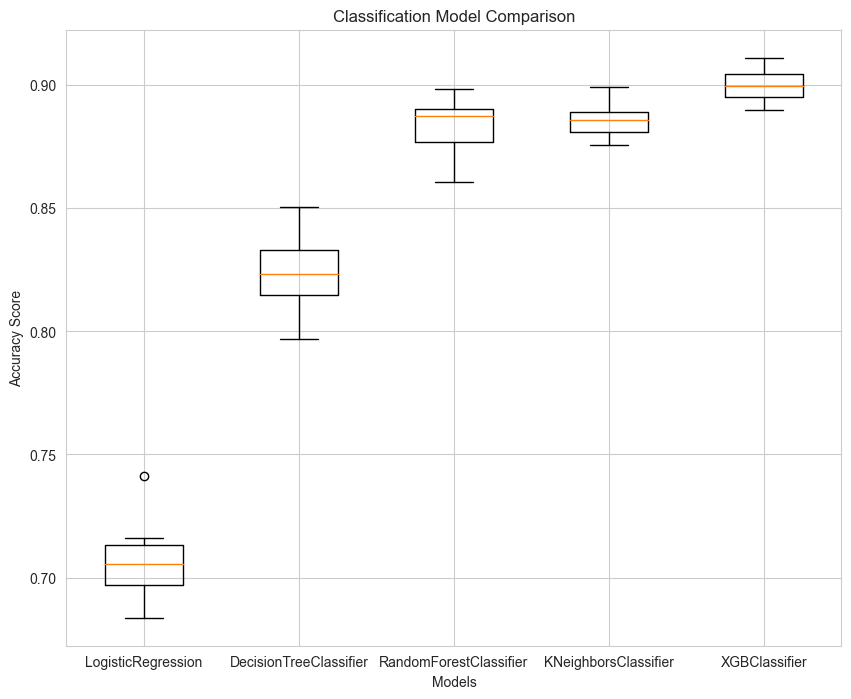

In [69]:
# Compare Classification Models
plt.figure(figsize=(10, 8))
plt.boxplot(results, labels=names)
plt.title('Classification Model Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')  # Updated for classification
plt.savefig("Model-Comparision.png", dpi=300, bbox_inches='tight')
plt.show()

# **Evaluating the best model**

In [70]:
model_xgb = XGBClassifier(**best_params["XGBClassifier"])

In [71]:
model_xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [72]:
y_pred = model_xgb.predict(X_test_pca)

In [73]:
print(accuracy_score(y_test, y_pred))

0.824


In [74]:
print(confusion_matrix(y_test, y_pred))

[[1413  194]
 [ 158  235]]


In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1607
           1       0.55      0.60      0.57       393

    accuracy                           0.82      2000
   macro avg       0.72      0.74      0.73      2000
weighted avg       0.83      0.82      0.83      2000



 98%|===================| 1970/2000 [00:55<00:00]        

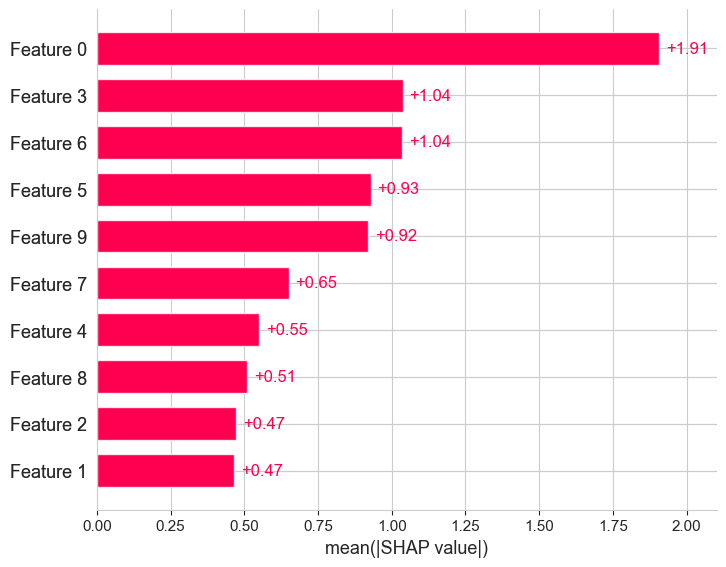

In [76]:
# Feature importance for XGBoost Classifier
import shap
explainer = shap.Explainer(model_xgb, X_train_res)
shap_values = explainer(X_test_pca)
shap.plots.bar(shap_values)

## *Conclusion:*

The classification report shows that the model achieves an overall accuracy of 82%, indicating strong performance in correctly predicting customer churn status across the dataset. The model performs particularly well for non-churned customers (class 0), with high precision (0.90) and recall (0.88), resulting in a strong F1-score of 0.89.

However, the performance for churned customers (class 1) is significantly lower, with a precision of 0.55 and recall of 0.60, leading to an F1-score of 0.57. This suggests that the model is missing a substantial number of actual churn cases and also misclassifying non-churned customers as churned in some cases.

While the weighted average F1-score of 0.83 reflects the influence of the majority class, the macro average F1-score of 0.73 highlights the need for better balance between classes. Improving the model’s ability to detect churned customers is essential for actionable business insights, as these customers are of primary concern.